In [2]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
img = cv2.imread("../opencv-np-workshop/data/img/regensburg.jpg")


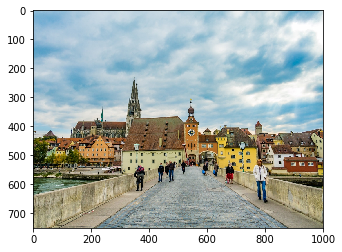

In [4]:
plt.imshow(img[:,:,::-1])

# Resize image

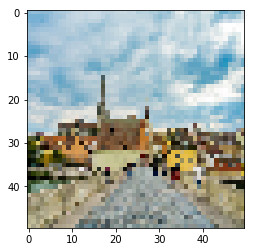

In [5]:
small = cv2.resize(img, dsize = (50,50)) 
plt.imshow(small[:,:,::-1])

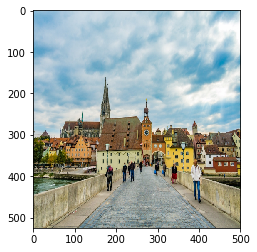

In [7]:
small2 = cv2.resize(img, dsize = None, fx = 0.5, fy = 0.7) # Contraction factors
plt.imshow(small2[:,:,::-1])

# Affine transformations

- Translations 
- Rotations

We need to specify affine transformation matrix

- cos theta | -sin theta | t_x
- sin theta | cos theta  | t_y

In [8]:
import numpy as np

**OpenCV gotcha:** Numpy's `float32` is the compatible float type for OpenCV.

In [9]:
# Translation
M = np.float32([[1, 0, 50],[0,1,100]])

In [10]:
M

array([[  1.,   0.,  50.],
       [  0.,   1., 100.]], dtype=float32)

In [11]:
rows, cols, channels = img.shape

In [12]:
translated = cv2.warpAffine(img, M, (cols,rows))

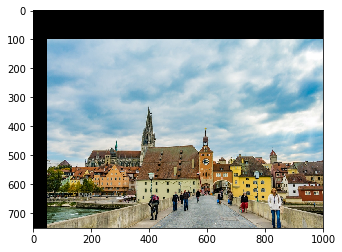

In [13]:
plt.imshow(translated[:,:,::-1])

## Rotation

In [14]:
theta = np.pi/6 # angle in radians
M2 = np.float32([
    [np.cos(theta), -np.sin(theta), 50],
    [np.sin(theta), np.cos(theta), 100]
])

In [15]:
M2

array([[  0.8660254,  -0.5      ,  50.       ],
       [  0.5      ,   0.8660254, 100.       ]], dtype=float32)

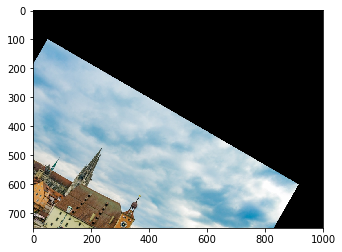

In [25]:
rotated = cv2.warpAffine(img, M2, (cols,rows), cv2.INTER_CUBIC)
plt.imshow(rotated[:,:,::-1])

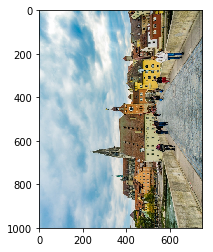

In [23]:
rot2 = cv2.rotate(img, 2)
plt.imshow(rot2[:,:,::-1])

# Homography transformations

Transformation of the image "as if" it was on 3D-space.

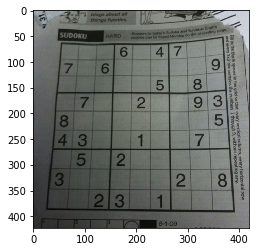

In [26]:
sudoku = cv2.imread("../opencv-np-workshop/data/img/sudoku-original.jpg")
plt.imshow(sudoku[:,:,::-1])

In [27]:
rows, cols, _ = sudoku.shape

In [37]:
pts_original = np.float32([
    [100,70],
    [300,10],
    [100, 200],
    [300,250]
])

pts_target = np.float32([
    [0,0],
    [100,0],
    [0,100],
    [100,100]
])

In [38]:
P = cv2.getPerspectiveTransform(pts_original,pts_target)

In [39]:
P

array([[ 1.60000000e+00,  0.00000000e+00, -1.60000000e+02],
       [ 4.00000000e-01,  1.33333333e+00, -1.33333333e+02],
       [ 7.33333333e-03, -0.00000000e+00,  1.00000000e+00]])

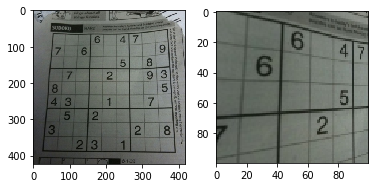

In [40]:
new_sudoku = cv2.warpPerspective(sudoku, P, (100,100))
plt.subplot(121)
plt.imshow(sudoku[:,:,::-1])
plt.subplot(122)
plt.imshow(new_sudoku[:,:,::-1])